In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import defaultdict
from os.path import join
from matplotlib import rcParams

sns.set_style("ticks")
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 1.5}) 

CASES = {
    "small_case": {
        "qos": "numerical_data/key_results/qos_data/small_case.csv",
        "req": "numerical_data/key_results/request_data/small_case.csv",
    },
    "large_case": {
        "qos": "numerical_data/key_results/qos_data/large_case.csv",
        "req": "numerical_data/key_results/request_data/large_case.csv",
    },
}

MARKERS = {
    "Optimal": "s",
    "AGP": "o",
    "EGP": "D",
    "Knapsack": "P",
    "Random": "X",
}
PALETTE = {
    "Optimal": "C0",
    "AGP": "C1",
    "EGP": "C2",
    "Knapsack": "C3",
    "Random": "C4",
}

In [2]:
case = "small_case"
# case = "large_case"
rename_columns = {"algorithm": "Algorithm", "runtime": "Runtime", "round": "Round"}

In [3]:
qos_data = pd.read_csv(CASES[case]["qos"])
qos_data = qos_data.rename(columns=rename_columns)
qos_data["QoS-Ratio"] = qos_data["QoS"] / qos_data["n_requests"]
qos_data.head()

,Unnamed: 0,Round,Algorithm,QoS,Runtime,n_requests,n_served,n_satisfied,n_partial_satisfied,QoS-Ratio
0,0,0,Optimal,46.521465,0.227734,50,50.0,7,40,0.930429
1,1,1,Optimal,45.141363,0.346462,50,48.0,11,37,0.902827
2,2,2,Optimal,46.241970,0.200901,50,50.0,9,32,0.924839
3,3,3,Optimal,45.919716,0.251258,50,50.0,4,43,0.918394
4,4,4,Optimal,46.539351,0.309918,50,50.0,11,40,0.930787


In [4]:
req_data = pd.read_csv(CASES[case]["req"])
req_data = req_data.rename(columns=rename_columns)
req_data.head()

,Unnamed: 0,Round,Algorithm,QoA,QoD,QoS,Runtime,n_requests,req_id,req_service,req_acc,req_delay,served_acc,served_delay
0,0,0,Optimal,0.845430,0.979457,0.912444,0.227734,50,0,49,0.876731,0.152149,0.722161,0.357578
1,1,0,Optimal,0.910958,1.000000,0.955479,0.227734,50,1,97,0.879851,0.956993,0.790809,0.592279
2,2,0,Optimal,1.000000,1.000000,1.000000,0.227734,50,2,53,0.701136,1.450247,0.832584,0.463003
3,3,0,Optimal,0.809354,1.000000,0.904677,0.227734,50,3,5,0.847130,3.968909,0.656484,0.690835
4,4,0,Optimal,0.857834,1.000000,0.928917,0.227734,50,4,33,0.935298,1.237533,0.793132,0.804049


In [5]:
served_data = defaultdict(list)
for n_requests in qos_data["n_requests"].unique():
    for r in qos_data["Round"].unique():
        for algorithm in qos_data["Algorithm"].unique():
            query = f"n_requests == {n_requests} and Round == {r} and Algorithm == '{algorithm}'"
            proportion = list(qos_data.query(query)["n_served"])[0] / n_requests
            served_data["Proportion"].append(proportion)
            served_data["n_requests"].append(n_requests)
            served_data["Algorithm"].append(algorithm)

served_data = pd.DataFrame.from_dict(served_data)
served_data.head()

,Proportion,n_requests,Algorithm
0,1.00,50,Optimal
1,0.96,50,EGP
2,1.00,50,AGP
3,0.82,50,Knapsack
4,0.20,50,Random


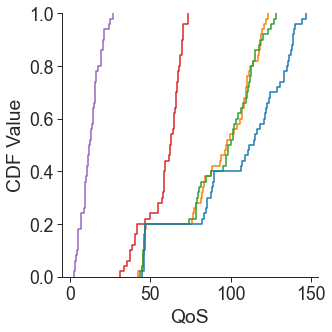

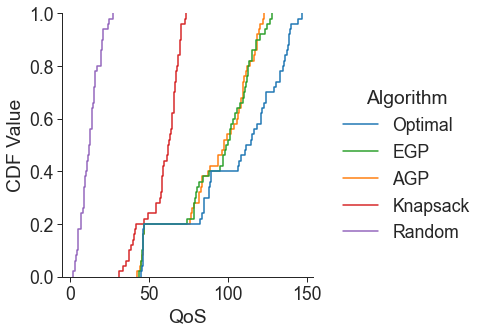

In [6]:
sns.displot(data=qos_data, kind="ecdf", x="QoS", hue="Algorithm", palette=PALETTE, legend=False)
plt.ylabel("CDF Value")
plt.tight_layout()
plt.savefig(f"plots/numerical/{case}_QoS-ecdf_no-legend.pdf")

sns.displot(data=qos_data, kind="ecdf", x="QoS", hue="Algorithm", palette=PALETTE)
plt.ylabel("CDF Value")
plt.savefig(f"plots/numerical/{case}_QoS-ecdf.pdf")
plt.show()

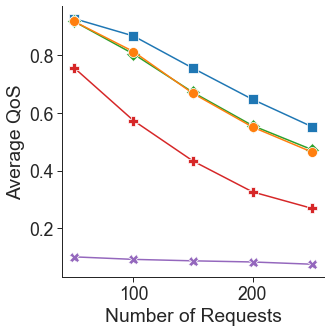

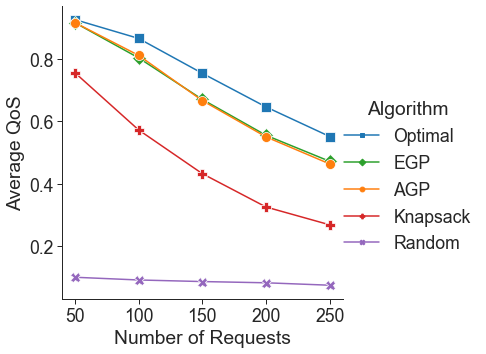

In [7]:
sns.relplot(data=qos_data, kind="line", x="n_requests", y="QoS-Ratio", hue="Algorithm", palette=PALETTE, style="Algorithm", markers=MARKERS, dashes=False, markersize=10, err_style=None, legend=False)
plt.ylabel("Average QoS")
plt.xlabel("Number of Requests")
# plt.yticks([i / 10 for i in range(11)])
plt.tight_layout()
plt.savefig(f"plots/numerical/{case}_QoS-line_no-legend.pdf")

sns.relplot(data=qos_data, kind="line", x="n_requests", y="QoS-Ratio", hue="Algorithm", palette=PALETTE, style="Algorithm", markers=MARKERS, dashes=False, markersize=10, err_style=None, legend=True)
plt.ylabel("Average QoS")
plt.xlabel("Number of Requests")
# plt.yticks([i / 10 for i in range(11)])
plt.savefig(f"plots/numerical/{case}_QoS-line.pdf")
plt.show()

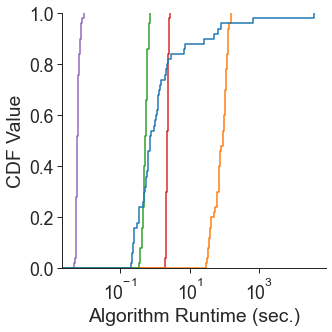

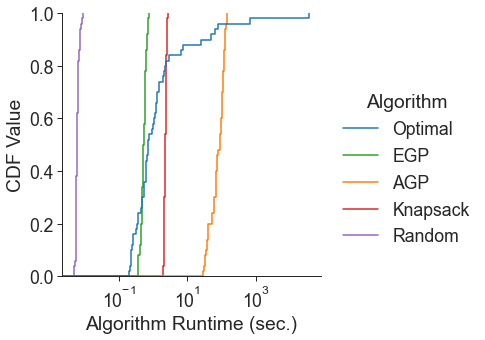

In [8]:
sns.displot(data=qos_data, kind="ecdf", x="Runtime", hue="Algorithm", palette=PALETTE, legend=False).set(xscale="log")
plt.xlabel("Algorithm Runtime (sec.)")
plt.ylabel("CDF Value")
plt.tight_layout()
plt.savefig(f"plots/numerical/{case}_runtime-ecdf_no-legend.pdf")

sns.displot(data=qos_data, kind="ecdf", x="Runtime", hue="Algorithm", palette=PALETTE).set(xscale="log")
plt.xlabel("Algorithm Runtime (sec.)")
plt.ylabel("CDF Value")
plt.savefig(f"plots/numerical/{case}_runtime-ecdf.pdf")
plt.show()

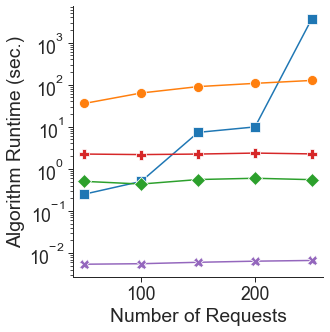

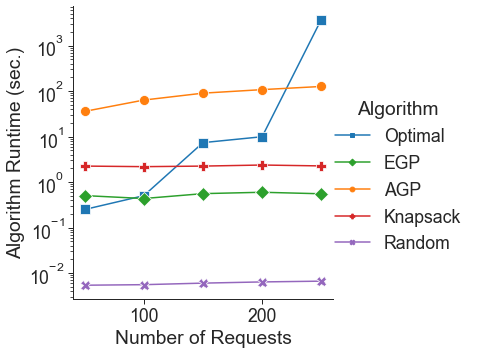

In [9]:
if case == "small_case":
    sns.relplot(data=qos_data, kind="line", x="n_requests", y="Runtime", markers=MARKERS, 
                hue="Algorithm", style="Algorithm", palette=PALETTE, dashes=False, 
                markersize=10, err_style=None, legend=False).set(yscale="log")
else:
    sns.relplot(data=qos_data, kind="line", x="n_requests", y="Runtime", markers=MARKERS, 
                hue="Algorithm", style="Algorithm", palette=PALETTE, dashes=False, 
                markersize=10, err_style=None, legend=False)
plt.xlabel("Number of Requests")
plt.ylabel("Algorithm Runtime (sec.)")
plt.tight_layout()
plt.savefig(f"plots/numerical/{case}_runtime-line_no-legend.pdf")

if case == "small_case":
    sns.relplot(data=qos_data, kind="line", x="n_requests", y="Runtime", markers=MARKERS, 
                hue="Algorithm", style="Algorithm", palette=PALETTE, dashes=False, 
                markersize=10, err_style=None, legend=True).set(yscale="log")
else:
    sns.relplot(data=qos_data, kind="line", x="n_requests", y="Runtime", markers=MARKERS, 
                hue="Algorithm", style="Algorithm", palette=PALETTE, dashes=False, 
                markersize=10, err_style=None, legend=True)
plt.xlabel("Number of Requests")
plt.ylabel("Algorithm Runtime (sec.)")
plt.savefig(f"plots/numerical/{case}_runtime-line.pdf")
plt.show()

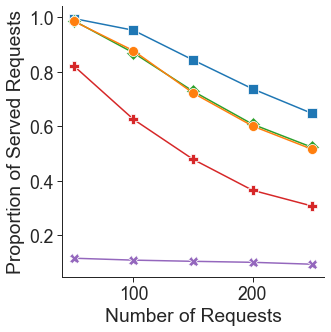

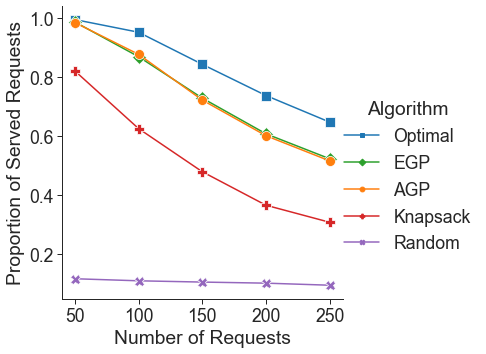

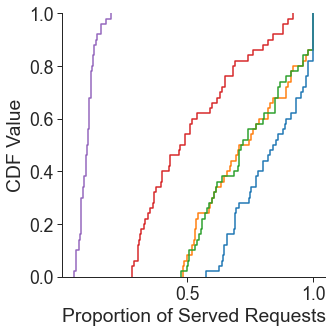

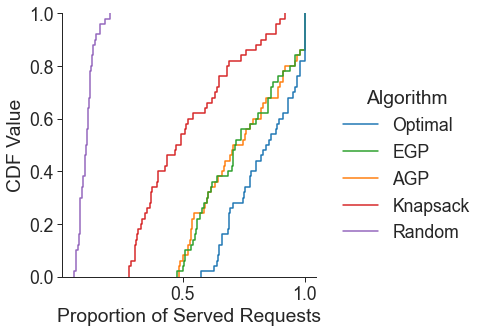

In [10]:
## Lineplot of served data.
sns.relplot(data=served_data, kind="line", x="n_requests", y="Proportion", hue="Algorithm", palette=PALETTE, markers=MARKERS, style="Algorithm", dashes=False, markersize=10, err_style=None, legend=False)
plt.ylabel("Proportion of Served Requests")
plt.xlabel("Number of Requests")
plt.tight_layout()
plt.savefig(f"plots/numerical/{case}_served-line_no-legend.pdf")

sns.relplot(data=served_data, kind="line", x="n_requests", y="Proportion", hue="Algorithm", palette=PALETTE, markers=MARKERS, style="Algorithm", dashes=False, markersize=10, err_style=None, legend=True)
plt.ylabel("Proportion of Served Requests")
plt.xlabel("Number of Requests")
plt.savefig(f"plots/numerical/{case}_served-line.pdf")
plt.show()

## ecdfplot of served data.
sns.displot(data=served_data, kind="ecdf", x="Proportion", hue="Algorithm", palette=PALETTE, legend=False)
plt.xlabel("Proportion of Served Requests")
plt.ylabel("CDF Value")
plt.tight_layout()
plt.savefig(f"plots/numerical/{case}_served-ecdf_no-legend.pdf")

sns.displot(data=served_data, kind="ecdf", x="Proportion", hue="Algorithm", palette=PALETTE)
plt.xlabel("Proportion of Served Requests")
plt.ylabel("CDF Value")
plt.savefig(f"plots/numerical/{case}_served-ecdf.pdf")
plt.show()

In [11]:
qos_data.head()

,Unnamed: 0,Round,Algorithm,QoS,Runtime,n_requests,n_served,n_satisfied,n_partial_satisfied,QoS-Ratio
0,0,0,Optimal,46.521465,0.227734,50,50.0,7,40,0.930429
1,1,1,Optimal,45.141363,0.346462,50,48.0,11,37,0.902827
2,2,2,Optimal,46.241970,0.200901,50,50.0,9,32,0.924839
3,3,3,Optimal,45.919716,0.251258,50,50.0,4,43,0.918394
4,4,4,Optimal,46.539351,0.309918,50,50.0,11,40,0.930787


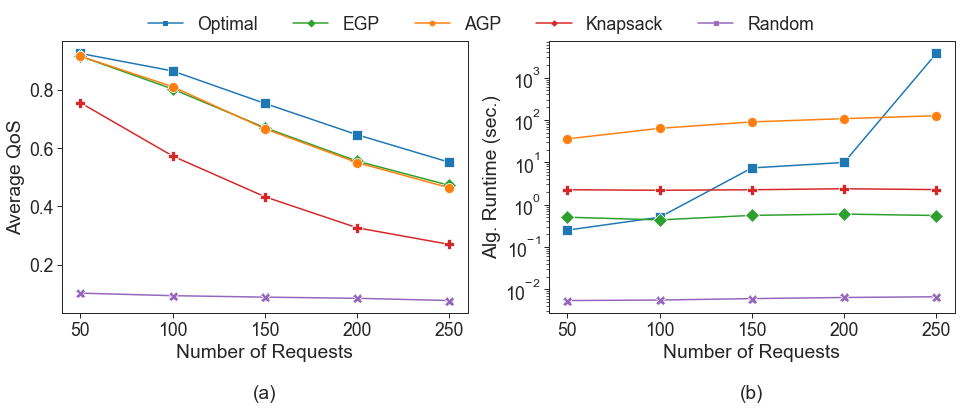

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(data=qos_data, ax=axes[0], x="n_requests", y="QoS-Ratio", hue="Algorithm", palette=PALETTE, style="Algorithm", markers=MARKERS, dashes=False, markersize=10, err_style=None, legend=False)
sns.lineplot(data=qos_data, ax=axes[1], x="n_requests", y="Runtime", hue="Algorithm", palette=PALETTE, style="Algorithm", markers=MARKERS, dashes=False, markersize=10, err_style=None, legend=True).set(yscale="log")

axes[0].set_ylabel("Average QoS")
axes[1].set_ylabel("Alg. Runtime (sec.)")

axes[0].set_xlabel("Number of Requests\n\n(a)")
axes[1].set_xlabel("Number of Requests\n\n(b)")

handles, labels = axes[1].get_legend_handles_labels()
axes[1].get_legend().remove()

# axes[0].text(0.5, 0.05, "(a)", ha="center")
# axes[1].text(0.5, 0.05, "(b)", ha="center")

fig.legend(handles, labels, loc="upper center", ncol=len(labels), frameon=False)
plt.show()

# Approximation Ratio
Here we show the approximation ratio of each algorithm when compared to the optimal solution in the `small_case` (or the validation case). We do not do the same for the `large_case` because the optimal solution was not performed for the larger experiments due to its computational heft.

In [13]:
if case == "small_case":
    opt = np.array(sorted(list(qos_data.query("Algorithm == 'Optimal'")["QoS"])))
    egp = np.array(sorted(list(qos_data.query("Algorithm == 'EGP'")["QoS"])))
    agp = np.array(sorted(list(qos_data.query("Algorithm == 'AGP'")["QoS"])))
    sck = np.array(sorted(list(qos_data.query("Algorithm == 'Knapsack'")["QoS"])))
    rnd = np.array(sorted(list(qos_data.query("Algorithm == 'Random'")["QoS"])))

    print(f"EGP's approximation ratio: {np.mean(egp/opt):0.3f}")
    print(f"AGP's approximation ratio: {np.mean(agp/opt):0.3f}")
    print(f"SCK's approximation ratio: {np.mean(sck/opt):0.3f}")
    print(f"RND's approximation ratio: {np.mean(rnd/opt):0.3f}")
else:
    print("Cannot calculate approximations to optimal under larger case.")

EGP's approximation ratio: 0.904
AGP's approximation ratio: 0.900
SCK's approximation ratio: 0.607
RND's approximation ratio: 0.118
